# Trabajando con Cassiopeia

In [33]:
import cassiopeia as cass
riot_API_key = "RGAPI-f7600f8e-ab1e-425a-8b7a-ee3f5cb66956"
cass.set_riot_api_key(riot_API_key)

In [34]:
name = "TomyAlex"
user_data = cass.get_summoner(name=name,region="LAN")
user_data
lista_maestrias = cass.get_champion_masteries(summoner=user_data,region="LAN")


Making call: https://la1.api.riotgames.com/lol/summoner/v4/summoners/by-name/TomyAlex
Making call: https://la1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/Nl-WF6DuK4x299t5k_PyhLy5YhZcXt414aPYRiy_0lWdKrQ


In [35]:
def extractpoints(champ):
    return champ.points

def extractNames(champ):
    return champ.champion.name

def extractLevel(champ):
    return champ.level

lista_maestrias_points = list(map(extractpoints,lista_maestrias))

lista_maestrias_names = list(map(extractNames,lista_maestrias))

lista_maestrias_level = list(map(extractLevel,lista_maestrias))



In [36]:
import pandas as pd
serie_points = pd.Series(lista_maestrias_points,name = "Puntos Maestria")
serie_names = pd.Series(lista_maestrias_names,name = "Nombre")
serie_level = pd.Series(lista_maestrias_level,name = "Nivel")

## DATAFRAME own masteries

In [37]:
df_own_masteries = pd.concat([serie_names,serie_points,serie_level],axis = 1,keys=["Nombre","Puntos maestria","Nivel"])
df_own_masteries

,Nombre,Puntos maestria,Nivel
0,Thresh,392550,7
1,Garen,290000,7
2,Jhin,226031,7
3,Yasuo,167358,7
4,Blitzcrank,118424,7
...,...,...,...
156,Nilah,0,0
157,Qiyana,0,0
158,Renata Glasc,0,0
159,Swain,0,0


In [38]:
#Quitar champs sin maestria
df_ownmastery_wz = df_own_masteries[df_own_masteries['Puntos maestria'] > 0]
df_ownmastery_wz

,Nombre,Puntos maestria,Nivel
0,Thresh,392550,7
1,Garen,290000,7
2,Jhin,226031,7
3,Yasuo,167358,7
4,Blitzcrank,118424,7
...,...,...,...
148,Akshan,204,1
149,Xerath,192,1
150,Viktor,123,1
151,Vex,116,1


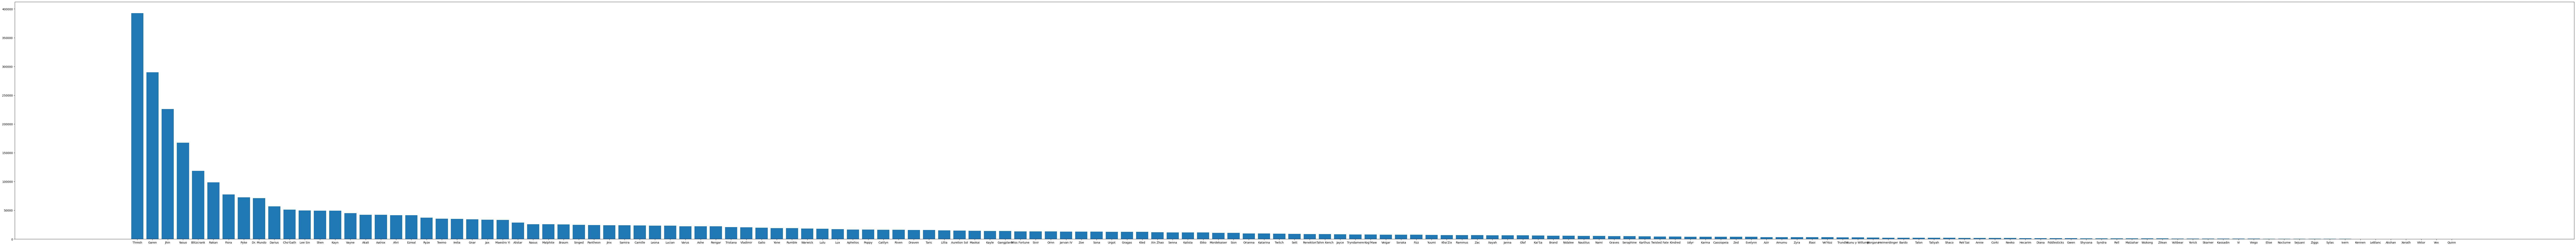

In [39]:
import matplotlib.pyplot as plt
#Graficas
#70 15
ancho = len(lista_maestrias_names)
plt.figure(figsize=(ancho,15))
plt.bar(x = df_ownmastery_wz["Nombre"],height=df_ownmastery_wz["Puntos maestria"])
plt.show()

In [40]:
print("Top 3")
df_ownmastery_wz.head(3)


Top 3


,Nombre,Puntos maestria,Nivel
0,Thresh,392550,7
1,Garen,290000,7
2,Jhin,226031,7


In [41]:
print("Last 3")
df_ownmastery_wz.tail(3)

Last 3


,Nombre,Puntos maestria,Nivel
150,Viktor,123,1
151,Vex,116,1
152,Quinn,86,1


In [42]:
path = "JSONS\\"+name+".json"
df_ownmastery_wz.to_json(path)
